# Bunching

Bunching at some wavelength $\lambda$ for a list of particles $z$ is given by the weighted sum of complex phasors:

$$B(z, \lambda) = \frac{\left|\sum_j w_j e^{i k z_j}\right|}{\sum w_j}$$

where $k = 2\pi/\lambda$ and $w_j$ are the weights of the particles.

See for example [D. Ratner's disseratation](https://www.osti.gov/servlets/purl/1443197). 

## Add bunching to particles

This uses a simple method to add perfect bunching at 0.1 µm

In [1]:
from pmd_beamphysics import ParticleGroup
%config InlineBackend.figure_format = 'retina'

In [2]:
P = ParticleGroup( 'data/bmad_particles2.h5')
P.drift_to_t()

wavelength = 0.1e-6
dz = (P.z/wavelength % 1) * wavelength
P.z -= dz

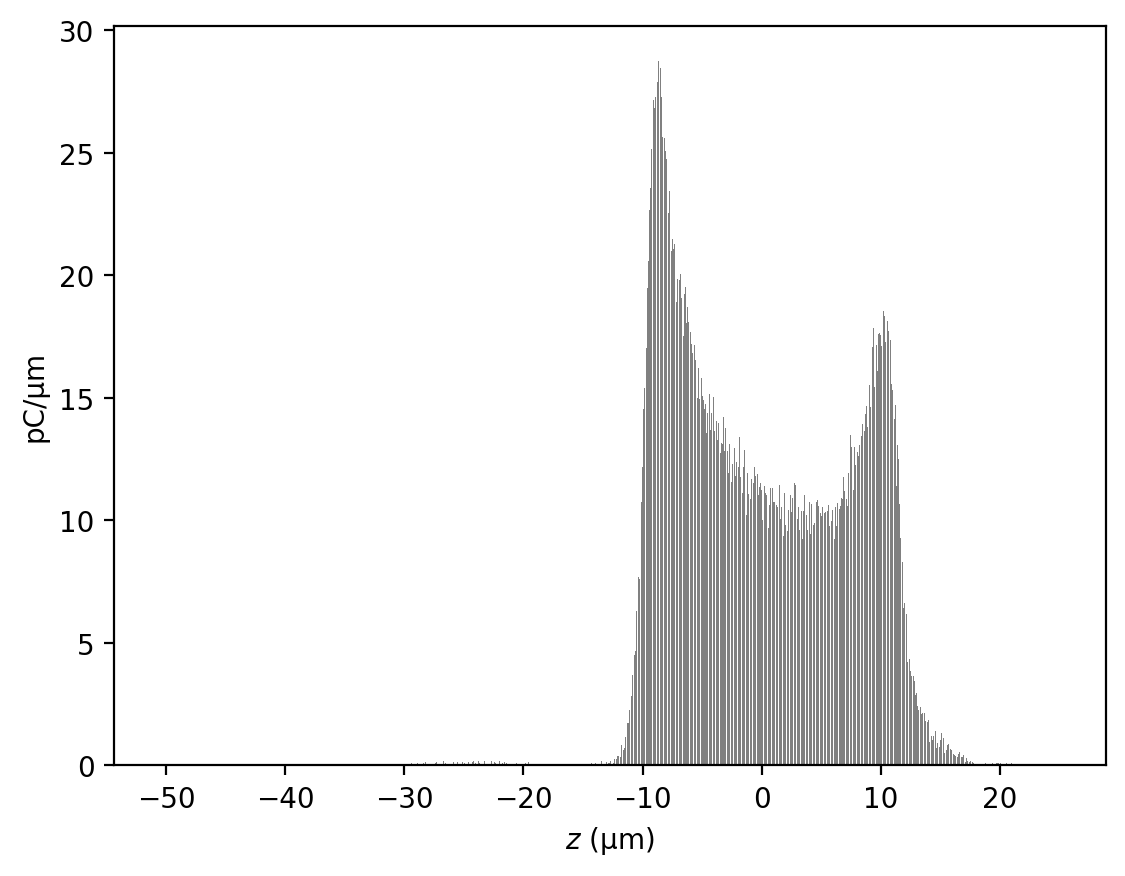

In [3]:
P.plot('z')

## Calculate bunching

All of these methods will calculate the bunching.

In [4]:
P.bunching(wavelength)

1.0

In [5]:
P['bunching_0.1e-6']

1.0

In [6]:
P['bunching_0.1_um']

1.0

In [7]:
P['bunching_0.1_µm']

1.0

# Simple plot

In [8]:
import numpy as np

import matplotlib.pyplot as plt


In [9]:
wavelengths = wavelength * np.linspace(0.9, 1.1, 200)

Text(0, 0.5, 'bunching')

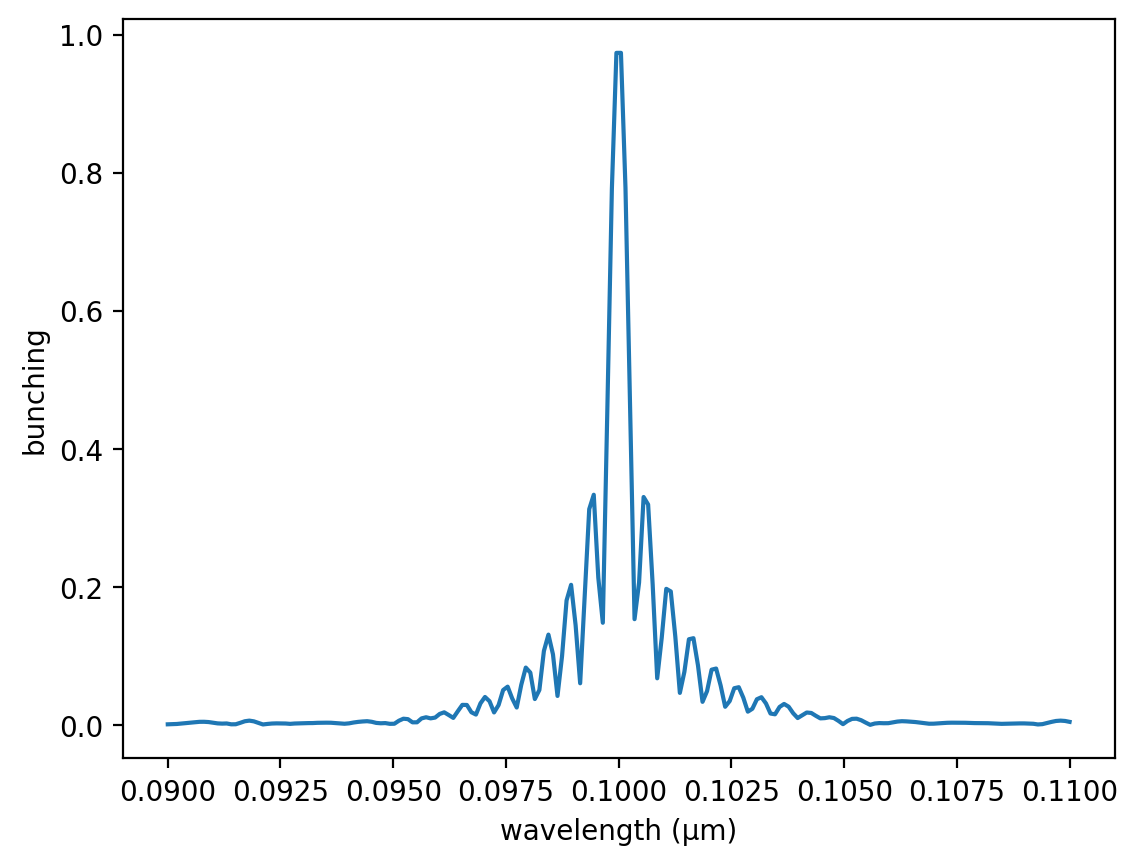

In [10]:
plt.plot(wavelengths*1e6, list(map(P.bunching, wavelengths)))
plt.xlabel('wavelength (µm)')
plt.ylabel('bunching')

## Bunching function

This is the function that is used.

In [11]:
from pmd_beamphysics.statistics import bunching

In [12]:
?bunching

Signature: bunching(z: numpy.ndarray, wavelength: float, weight: numpy.ndarray = None) -> float
Docstring:
Calculate the normalized bunching parameter, which is the magnitude of the 
complex sum of weighted exponentials at a given point.

The formula for bunching is given by:

$$
ight|}{\sum w_i}
$$

where:
- \( z \) is the position array,
- \( \lambda \) is the wavelength,
- \( k = rac{2\pi}{\lambda} \) is the wave number,
- \( w_i \) are the weights.

Parameters
----------
z : np.ndarray
    Array of positions where the bunching parameter is calculated.
wavelength : float
    Wavelength of the wave.
weight : np.ndarray, optional
    Weights for each exponential term. Default is 1 for all terms.

Returns
-------
float
    The normalized bunching parameter.

Raises
------
ValueError
    If `wavelength` is not a positive number.
File:      ~/Code/GitHub/openPMD-beamphysics/pmd_beamphysics/statistics.py
Type:      function
